In [54]:
#!pip install opencv-python
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

In [55]:
imagem = cv2.imread(r'arq.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

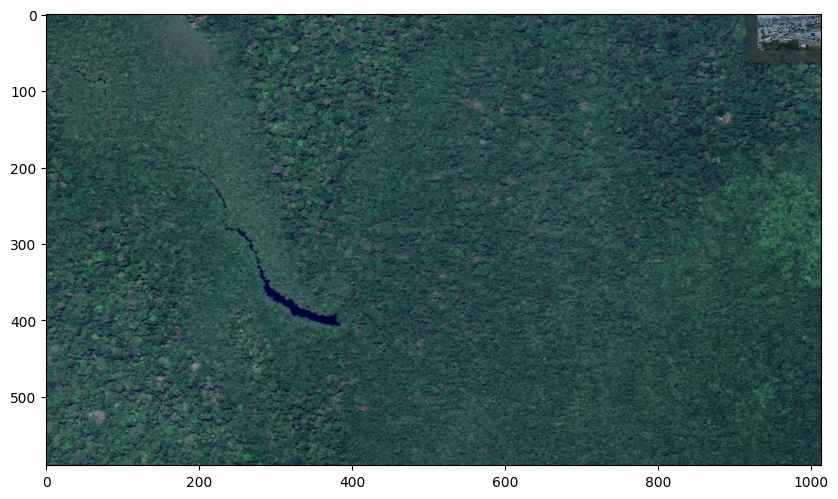

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(imagem)

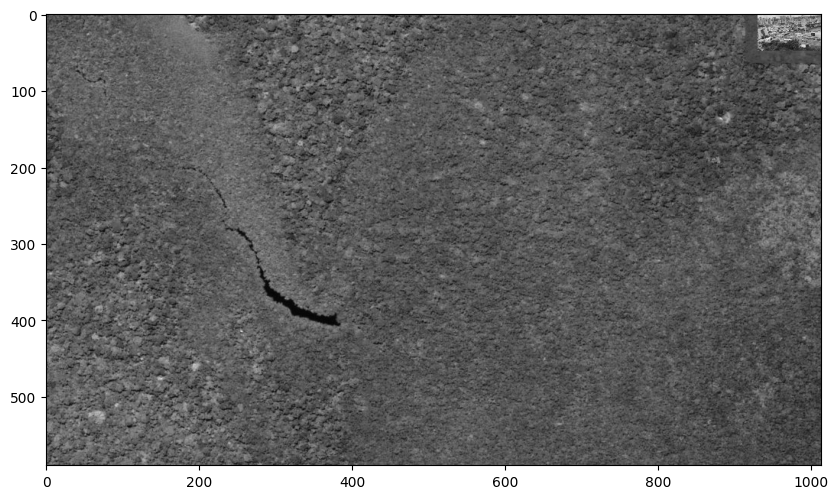

In [57]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(imagem_cinza, cmap='gray')

Muitos detalhes: Altas frequências. (Detalhes de imagens)
Poucos detalhes: Baixa frequência. (Fundo de imagens)

Suavização de imagens.

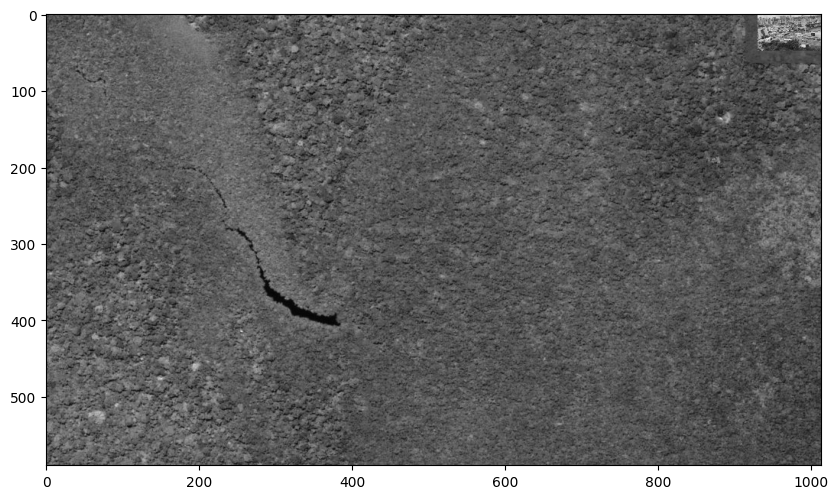

In [58]:
imagem_suavizada = cv2.blur(imagem_cinza, (1,1))
plt.figure(figsize=(10,10))
plt.imshow(imagem_suavizada, cmap='gray')

Processo de limiarização.

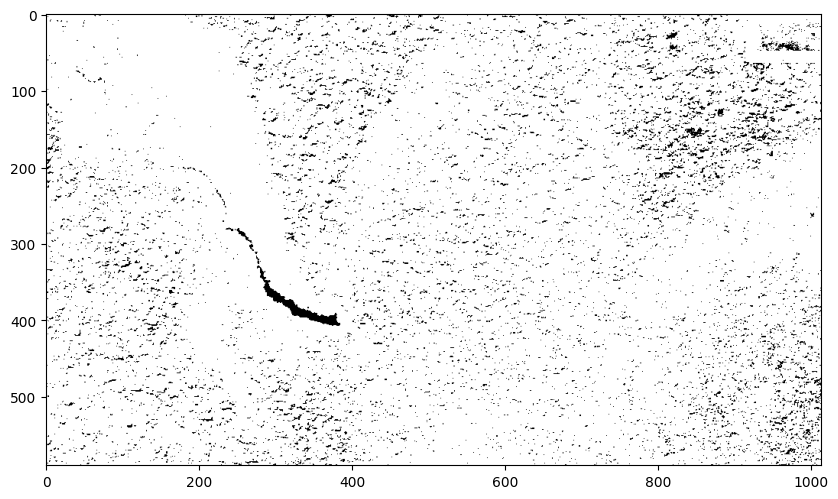

In [59]:
_, imagem_limiar = cv2.threshold(imagem_suavizada, 40, 10, cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(imagem_limiar, cmap='gray')

In [60]:
contornos, _ = cv2.findContours(imagem_limiar, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos: ", len(contornos))

Contornos:  8141


In [73]:
imagem_contorno = imagem.copy()
contador = 0

for contorno in contornos:
    (x,y,w,h) = cv2.boundingRect(contorno)
    
    area = cv2.contourArea(contorno)

    if area > 0 and area < 1000 :
        razao_contorno = w/h

        if razao_contorno > 0.01 and razao_contorno < 5:
            
            cv2.circle(imagem_contorno, (x,y), 1, (0,255,0), 2)
            contador += 1

print("contador de circulos: ", contador)
    

contador de circulos:  8127


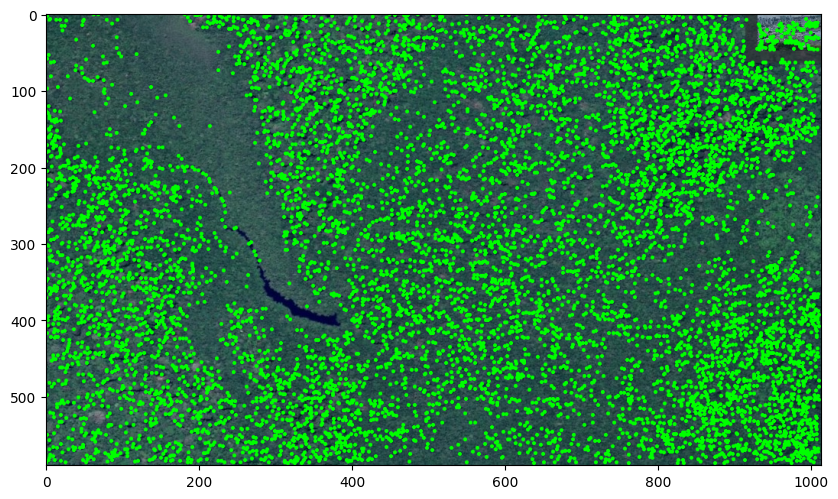

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(imagem_contorno, cmap='gray')